# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [20]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, LeaveOneOut
from scripts.classifiers.linear_svm import svm_loss_naive, svm_loss_vectorized 
from scripts.classifiers import LinearSVM

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [21]:
digits = load_digits()

X = digits.data
y = digits.target

In [22]:
# словарь из индексов изображений для каждого класса
class_indices = {}
for idx, label in enumerate(y):
    if label not in class_indices.keys():
        class_indices[label] = []
    class_indices[label].append(idx)

print(class_indices)

{0: [0, 10, 20, 30, 36, 48, 49, 55, 72, 78, 79, 101, 126, 130, 140, 150, 160, 166, 178, 179, 185, 202, 208, 209, 229, 252, 256, 266, 276, 286, 292, 304, 305, 311, 328, 334, 335, 357, 382, 386, 396, 406, 416, 422, 434, 435, 441, 458, 464, 465, 487, 512, 516, 526, 536, 546, 552, 564, 565, 571, 588, 594, 595, 617, 642, 646, 656, 666, 676, 682, 694, 695, 701, 718, 724, 725, 747, 772, 776, 786, 796, 806, 812, 824, 825, 831, 848, 854, 855, 877, 902, 915, 925, 935, 941, 957, 974, 980, 981, 1002, 1025, 1029, 1039, 1049, 1059, 1065, 1077, 1078, 1082, 1099, 1105, 1106, 1128, 1153, 1157, 1167, 1177, 1187, 1193, 1205, 1206, 1212, 1229, 1235, 1236, 1258, 1283, 1287, 1297, 1307, 1317, 1323, 1335, 1336, 1342, 1359, 1365, 1366, 1388, 1413, 1415, 1425, 1435, 1445, 1451, 1463, 1464, 1470, 1487, 1493, 1494, 1516, 1541, 1545, 1555, 1563, 1573, 1579, 1591, 1592, 1598, 1615, 1620, 1642, 1663, 1667, 1677, 1687, 1697, 1703, 1715, 1716, 1722, 1739, 1745, 1746, 1768, 1793], 1: [1, 11, 21, 42, 47, 56, 70, 80, 85

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



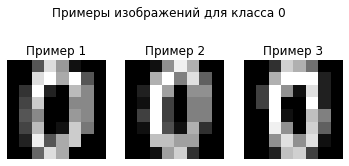

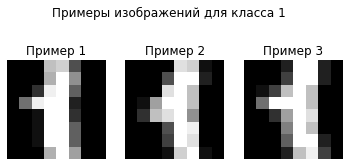

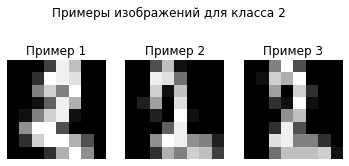

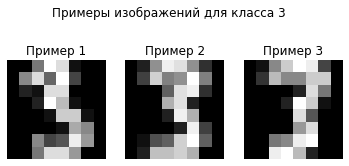

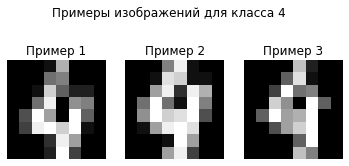

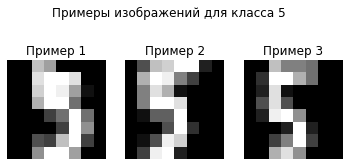

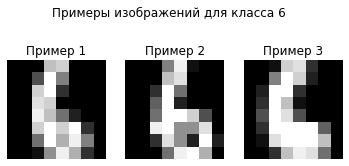

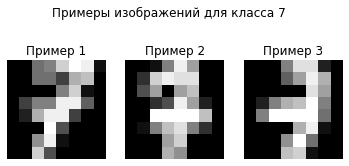

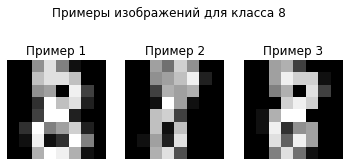

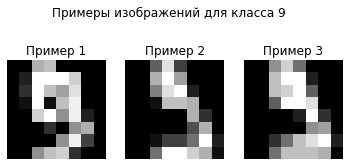

In [23]:
num_examples = 3
for label in range(10):
    plt.figure(figsize=(6, 3))
    plt.suptitle(f"Примеры изображений для класса {label}")
    for i, idx in enumerate(class_indices[label][:num_examples]):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(X[idx].reshape(8, 8), cmap='gray')
        plt.axis('off')
        plt.title(f"Пример {i + 1}")
    plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (1437, 64)
Training labels shape:  (1437,)
Test data shape:  (360, 64)
Test labels shape:  (360,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [25]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(x_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [26]:
y_pred = classifier.predict(x_test, k=3, num_loops=0)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


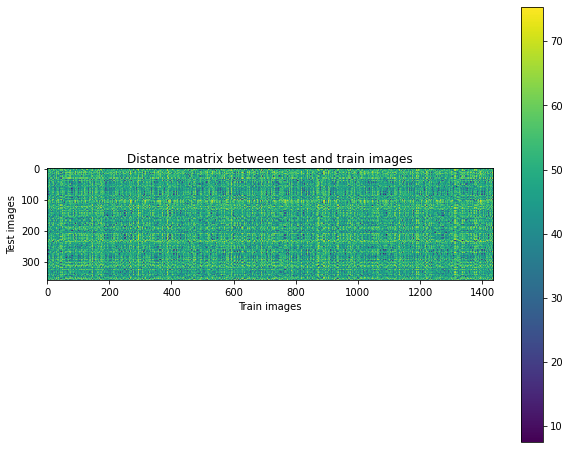

In [27]:
# Квадраты расстояний
squared_dists = np.sum(x_test**2, axis=1)[:, np.newaxis] + np.sum(classifier.X_train**2, axis=1) - 2 * np.dot(x_test, classifier.X_train.T)
# Рассстояния
dists = np.sqrt(squared_dists)

# Рисуем матрицу
plt.imshow(dists, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Train images')
plt.ylabel('Test images')
plt.title('Distance matrix between test and train images')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [28]:
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

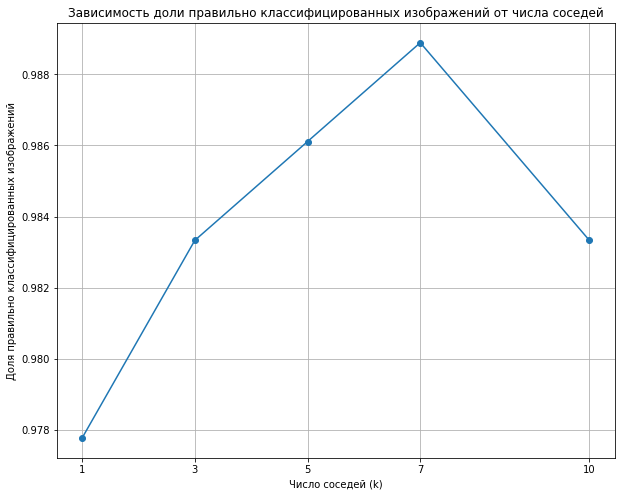

In [29]:
# числа соседей 
k_values = [1, 3, 5, 7, 10]

# точности
accuracies = []

for k in k_values:
    y_pred = classifier.predict(x_test, k=k, num_loops=0)
    accuracy = np.mean(y_pred == y_test) # точность
    accuracies.append(accuracy)

# график зависимости точности от k 
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title('Зависимость доли правильно классифицированных изображений от числа соседей')
plt.xlabel('Число соседей (k)')
plt.ylabel('Доля правильно классифицированных изображений')
plt.xticks(k_values)
plt.grid(True)
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [30]:
loo = LeaveOneOut()
accuracies = [] #точности

for k in k_values:
    correct = 0 #кол-во правильных предсказаний
    for train_index, test_index in loo.split(x_train):
        x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
        
        classifier.train(x_train_fold, y_train_fold)
        y_pred = classifier.predict(x_val_fold, k=k)
        
        if y_pred == y_val_fold:
            correct += 1
    
    accuracy = correct / len(x_train) #кол-во правильных предсказаний/общее кол-во обучающих данных
    accuracies.append(accuracy)

best_k = k_values[np.argmax(accuracies)]
print(f'Best k value based on LOOCV: {best_k}')

Best k value based on LOOCV: 1



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [31]:
y_pred = classifier.predict(x_test, k=1, num_loops=0)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


1.11 Сделайте выводы по результатам 1 части задания.

Метод kNN основан на принципе, при котором объекты, близкие в пространстве признаков, чаще всего принадлежат к одному классу или имеют похожие значения целевой переменной. Важным параметром этого метода является количество соседей k, которое необходимо выбирать оптимальным образом для достижения наилучшей производительности алгоритма.

Проведение данной лабораторной работы позволило оценить работу классификатора kNN на наборе данных MNIST, определить оптимальное значение параметра k и проверить его эффективность на тестовой выборке.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)  # 60% обучающая, 20% валидационная, 20% тестовая

# преобразование  в одномерный массив
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

print("Обучающая выборка:", x_train.shape, y_train.shape)
print("Валидационная выборка:", x_val.shape, y_val.shape)
print("Тестовая выборка:", x_test.shape, y_test.shape)

Обучающая выборка: (1077, 64) (1077,)
Валидационная выборка: (360, 64) (360,)
Тестовая выборка: (360, 64) (360,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[0.00000000e+00 2.99907149e-01 5.14948932e+00 1.17966574e+01
 1.19359331e+01 5.89972145e+00 1.39832869e+00 1.42989786e-01
 6.49953575e-03 1.93129062e+00]


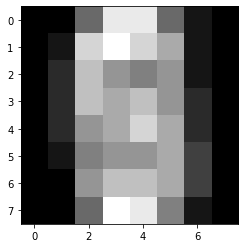

(1077, 65) (360, 65) (360, 65)


In [33]:
mean_image = np.mean(x_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((8, 8)).astype('uint8')) 
plt.show()


x_train -= mean_image
x_val -= mean_image
x_test -= mean_image



x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])


print(x_train.shape, x_val.shape, x_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [34]:
W = np.random.randn(65, 10) * 0.0001 

loss, grad = svm_loss_naive(W, x_train, y_train, 0.000005)
print('loss: %f' % (loss, ))

loss: 8.992892



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [35]:

loss, grad = svm_loss_naive(W, x_train, y_train, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, x_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, x_train, y_train, 5e1)
f = lambda w: svm_loss_naive(w, x_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 1.226196 analytic: 1.226196, relative error: 2.932009e-10
numerical: -0.278862 analytic: -0.278862, relative error: 1.484495e-09
numerical: 0.148699 analytic: 0.148699, relative error: 4.362001e-09
numerical: 2.435632 analytic: 2.435632, relative error: 1.372484e-10
numerical: 4.317290 analytic: 4.317290, relative error: 9.674724e-11
numerical: -4.337981 analytic: -4.337981, relative error: 6.543230e-11
numerical: -4.595626 analytic: -4.595626, relative error: 6.575104e-12
numerical: -0.081419 analytic: -0.081419, relative error: 6.926651e-09
numerical: 1.115120 analytic: 1.115120, relative error: 3.644730e-10
numerical: -3.918231 analytic: -3.918231, relative error: 3.538580e-11
numerical: 0.287643 analytic: 0.287643, relative error: 1.018134e-09
numerical: -3.189070 analytic: -3.189070, relative error: 8.367917e-11
numerical: -2.266643 analytic: -2.266643, relative error: 1.921454e-11
numerical: -0.001566 analytic: -0.001566, relative error: 2.085664e-10
numerical: -0.0153

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [36]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, x_train, y_train, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, x_train, y_train, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.064895s
Vectorized loss and gradient: computed in 0.000000s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [37]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(x_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 26.310977
iteration 100 / 1500: loss 15.313411
iteration 200 / 1500: loss 11.287060
iteration 300 / 1500: loss 9.803462
iteration 400 / 1500: loss 9.262833
iteration 500 / 1500: loss 9.064610
iteration 600 / 1500: loss 8.993416
iteration 700 / 1500: loss 8.963736
iteration 800 / 1500: loss 8.952577
iteration 900 / 1500: loss 8.946565
iteration 1000 / 1500: loss 8.948949
iteration 1100 / 1500: loss 8.948111
iteration 1200 / 1500: loss 8.949625
iteration 1300 / 1500: loss 8.948719
iteration 1400 / 1500: loss 8.950697
That took 0.384790s


In [39]:
y_train_pred = svm.predict(x_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(x_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.869081
validation accuracy: 0.863889


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [42]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

results = {} #результаты точности модели
best_val = -1 
best_svm = None

#все комбинации параметров 
grid_search = [ (lr,rg) for lr in learning_rates for rg in regularization_strengths ]

for lr, rg in grid_search:
    svm = LinearSVM()
    
    train_loss = svm.train(x_train, y_train, learning_rate=lr, reg=rg, num_iters=1500, verbose=False) #обучение с текущими парметрами
    y_train_pred = svm.predict(x_train)
    
    train_accuracy = np.mean(y_train_pred == y_train)# точность
    
    y_val_pred = svm.predict(x_val)
    val_accuracy = np.mean(y_val_pred == y_val)
    
    results[(lr,rg)] = (train_accuracy, val_accuracy)
    if best_val < val_accuracy:
        best_val = val_accuracy
        best_svm = svm

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best accuracy: %f' % best_val)

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.866295 val accuracy: 0.861111
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.868152 val accuracy: 0.861111
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.054782 val accuracy: 0.050000
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.106778 val accuracy: 0.083333
best accuracy: 0.861111


2.9 Сделайте выводы по второй части задания

Основной концепцией метода опорных векторов (SVM) является построение гиперплоскости в многомерном пространстве признаков, которая наилучшим образом разделяет объекты разных классов. SVM обладает высокой обобщающей способностью и демонстрирует эффективность на выборках среднего и большого размера.